To determine relationship between population growth,Urban population and Gdp  am going to use Python as the statistical tool for correlation analysis and regression analysis..


In [16]:
#importing the necessary libraries for analysis
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
#loading the datasets into python
gdp_data = pd.read_csv("C:\\Users\\UCHIHA MADARA\\Desktop\\mary\\gdp.csv")
print(gdp_data)
#GDP data



    Unnamed: 0                       GDP          Per Capita            Growth
0         date   GDP ( Billions of US $)   Per Capita (US $)   Annual % Change
1   31/12/1961               0.792959472             98.5353           -7.7746
2   31/12/1962                 0.8681114            103.7967            9.4574
3   31/12/1963               0.926589349            106.5388            8.7783
4   31/12/1964               0.998759334             110.392            4.9645
..         ...                       ...                 ...               ...
57  31/12/2017               82.03580087           1675.9739             3.838
58  31/12/2018               92.20295632           1845.7829            5.6479
59  31/12/2019               100.3797137           1970.1051            5.1142
60  31/12/2020               100.6665427           1936.4246           -0.2502
61  31/12/2021               110.3470795           2081.7999            7.5174

[62 rows x 4 columns]


In [4]:
pop_data = pd.read_csv("C:\\Users\\UCHIHA MADARA\\Desktop\\mary\\popgrowth.csv")
print(pop_data)
#population growth data

           date   Population   Annual Growth Rate
0    31/12/1961    8047470.0                 3.82
1    31/12/1962    8363578.0                 3.93
2    31/12/1963    8697200.0                 3.99
3    31/12/1964    9047387.0                 4.03
4    31/12/1965    9417207.0                 4.09
..          ...          ...                  ...
135         NaN          NaN                  NaN
136         NaN          NaN                  NaN
137         NaN          NaN                  NaN
138         NaN          NaN                  NaN
139         NaN          NaN                  NaN

[140 rows x 3 columns]


In [5]:
#Analysis of merged data of population and Gdp focusing on annual % change in Gdp and annual % change in population
merged_data = pd.read_excel("C:\\Users\\UCHIHA MADARA\\Desktop\\mary\\merge.xlsx")
print(merged_data)

         DATE     GDP   URBAN  POPULATION
0  1961-12-31 -7.7746  6.4680        3.82
1  1962-12-31  9.4574  6.5782        3.93
2  1963-12-31  8.7783  7.2510        3.99
3  1964-12-31  4.9645  7.3717        4.03
4  1965-12-31  2.0091  7.3984        4.09
..        ...     ...     ...         ...
56 2017-12-31  3.8380  3.9112        2.20
57 2018-12-31  5.6479  3.7793        2.05
58 2019-12-31  5.1142  3.7278        2.00
59 2020-12-31 -0.2502  3.7682        2.03
60 2021-12-31  7.5174  3.7060        1.96

[61 rows x 4 columns]


In [34]:
#descriptive summary of the data
merged_data.describe()

,GDP,URBAN,POPULATION
count,61.000000,61.000000,61.000000
mean,4.607866,5.370243,3.203607
std,4.433143,1.544028,0.601958
min,-7.774600,3.706000,1.960000
25%,2.154000,4.283400,2.850000
50%,4.300600,4.659600,3.260000
75%,6.203200,7.287400,3.700000
max,22.173900,8.270600,4.090000


In [19]:
urban_data= pd.read_csv("C:\\Users\\UCHIHA MADARA\\Desktop\\mary\\urbanpop.csv")
print(urban_data)

    Unnamed: 0         Population   % of Total            Change
0         date   Urban Population   % of Total   Annual % Change
1   31/12/1961             608791        7.565             6.468
2   31/12/1962             650185        7.774            6.5782
3   31/12/1963             699081        8.038             7.251
4   31/12/1964             752562        8.318            7.3717
..         ...                ...          ...               ...
57  31/12/2017           13001604       26.562            3.9112
58  31/12/2018           13502378        27.03            3.7793
59  31/12/2019           14015215       27.507            3.7278
60  31/12/2020           14553419       27.995            3.7682
61  31/12/2021           15102890       28.493             3.706

[62 rows x 4 columns]


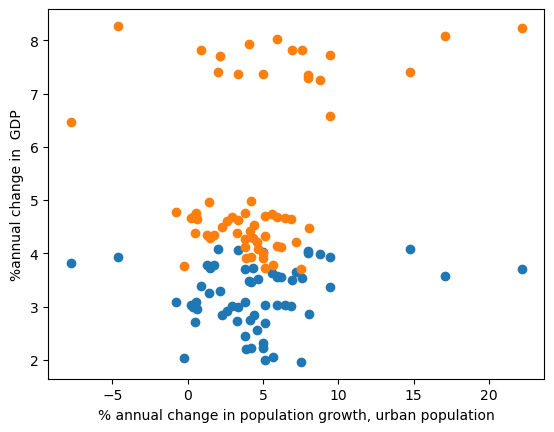

In [7]:
#scatter plot of relationship between gdp and population
y = merged_data['GDP']
x = merged_data[['POPULATION', 'URBAN']]
plt.ylabel("%annual change in  GDP")
plt.xlabel("% annual change in population growth, urban population")
plt.scatter(merged_data['GDP'], merged_data['POPULATION'])
plt.scatter(merged_data['GDP'], merged_data['URBAN'])
plt.show()

<AxesSubplot:xlabel='POPULATION', ylabel='GDP'>

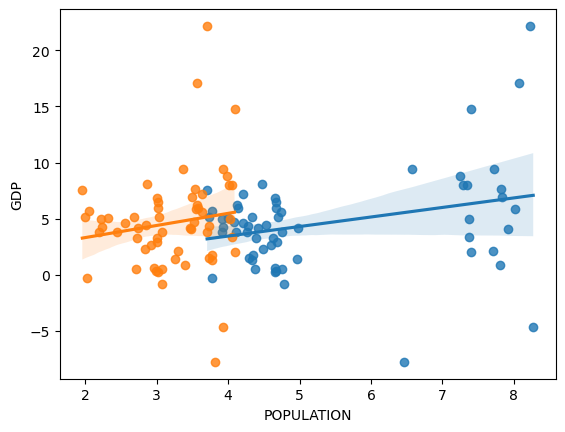

In [33]:
#plotting a regression plot
sns.regplot(merged_data["URBAN"], merged_data["GDP"])
sns.regplot(merged_data["POPULATION"], merged_data["GDP"])
                        

In [9]:
# regression analysis of the  data model
X =  merged_data[['POPULATION', 'URBAN']]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.923
Date:                Tue, 25 Apr 2023   Prob (F-statistic):             0.0617
Time:                        08:54:08   Log-Likelihood:                -173.96
No. Observations:                  61   AIC:                             353.9
Df Residuals:                      58   BIC:                             360.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1403      3.004      0.380      0.7

In [10]:
#lets look at correlation matrix in the merged data
merged_data.corr()


,GDP,URBAN,POPULATION
GDP,1.000000,0.296254,0.146746
URBAN,0.296254,1.000000,0.652876
POPULATION,0.146746,0.652876,1.000000


In [25]:
#finding the the correlation coefficient between the variables(urban,population and gdp)
corr1, p_value1 = pearsonr(merged_data['URBAN'],merged_data["GDP"])
print(corr1,p_value1)


0.29625367939557173 0.020435542640314244


In [26]:
#correlation coefficint between urban and population
corr2,p_value2 = pearsonr(merged_data["URBAN"], merged_data["POPULATION"])
print(corr2,p_value2)

0.6528755186571957 1.1833750138486902e-08


In [27]:
#correlation coefficient  between population and gdp
corr3,p_value3 = pearsonr(merged_data["POPULATION"], merged_data["GDP"])
print(corr3,p_value3)

0.1467464816983657 0.25909269472647894
